*** Материал переработан. Исходник содержал много мусора.
### Занятие 8. АБ-тестирование (проверяем все в онлайн-экспериментах)

### План занятия

1. вспоминаем самое первое занятие
2. "типичное" устройство АБ-тестов
3. метрики для сравнения
4. оценка размера выборки ДО проведения эксперимента
5. параметрические и непараметрические критерии

Пример как может выглядеть решение задачи бизнеса с помощью ML

<img src="tdsp-lifecycle2.png" alt="TDSP" style="width: 800px;" align="center"/>

Если же сделать процесс более "линейным", то он может выглядеть так:

Проблема -> Анализ -> Продуктовая гипотеза -> Метрики и критерии приемки -> ML решение -> AB-тестирование -> Оценка результатов -> Интеграция с другими командами

#### Что такое "продуктовая гипотеза"?

Предположение о том, что мы ожидаем при том или ином изменении в продукте (новый функционал вроде системы рекомендаций или улучшение уже существующего). Под изменением обычно подразумевается улучшение некоторой бизнес-метрики. 

### Пример - сервис для чтения книг онлайн

- чтение книг онлайн
- монетизация в основном за счет подписок + платный контент
- стабильный DAU**
<img src="books.png" alt="reading" style="width: 400px;" align="right"/>

** DAU (daily active users) - число уникальных пользователей за сутки

Что же мы хотим сделать? - улучшить наш сервис, чтобы он стал более удобным для пользователей и более прибыльным для бизнеса.

Один из вариантов это сделать - <b>персональные рекомендации</b>**

** по персональным рекомендациям и как такие системы строятся - есть курс на geekbrains

Предположим, что мы со своей частью справляемся и можем сделать простейшую систему рекомендаций книг.

Что дальше?

## Сразу в "прод"?
<img src="good_enough.jpg" alt="good_enough" style="width: 200px;" align="center"/>

## Конечно же нет!

#### Что нам нужно сделать?

1. Формулировка задачи и выбор метрики (DS)
2. Сбор данных и подготовка датасета
3. Построение модели (обучение)
4. Оборачивание всего этого в пайплайн обучения (для того, чтобы использовать в production)
5. Оценка результатов и проведение экспериментов
6. Мониторинг качества, логгирование

### Практический пример 1

Допустим, что мы занимаемся рекомендациями в интернет-магазине.<br>
У нас уже есть рекомендательная система на основе метода A. 

При этом в результате исследований метод B показал лучшие по сравнению с А офлайн-метрики (обычно ML-метрики)

Означает ли, что такое решение будет лучше и с точки зрения бизнес-метрик? - Необязательно, мы должны будем это проверить. 

#### Вопрос 1
А что если альтернативных вариантов очень много - как выбирать? 

#### Вопрос 2
Почему мы не можем тестировать их все? Или можем?

#### Вопрос 3
Можно ли измерять сразу несколько метрик?

#### Вопрос 4
Какие вы можете придумать "комбинированные" метрики?

### Метрика для нашего примера?

В случае с рекомендательной системой может быть много разных метрик, которые нам в итоге будут интересны:

1. arpu (average revenue per user) - средняя выручка одного пользователя
2. appu (average purchases per user) - среднее количество покупок на пользователя
3. crp (conversion rate payment) - доля пользователей, совершивших платеж
4. retention_N_day - удержание N-го дня
5. etc

*не всегда эти метрики связаны с revenue (например, количество кликов по баннеру или количество кликов по рекомендуемому фильму/книге/песне и т.д)

### АБ тестирование

Предположим что с метрикой мы определились (вообще - на практике обычно измеряют сразу несколько метрик).

Далее мы собрали данные и обучили новую рекомендательную модель. Настало время проверить ее на практике и сравнить по выбранным метрикам с текущим решением!

Как может быть устроен АБ-тест:

#### Как обычно проходит тест:

1. случайно разбиваем аудиторию на две группы: A (обычно ее называют "контролем") и B (группа "экспериментальная")
2. группа А - текущий вариант модели в проде. Группа B - наша новая модель
3. по окончанию эксперимента мы сравниваем бизнес-метрику (вероятно даже не одну) в каждой из групп с помощью <b>статистического теста</b>

![ab_split](ab1.png "AB split")

Конечно же групп может быть гораздо больше (если позволяет размер аудитории и дизайн эксперимента), но такой случай не только самый простой в плане проведения, но и оценки результатов. 

Итак, предположим, что мы запустили АБ тест и подождали, когда накопится статистика

Ожидаем что после введения системы DailyActiveUsers вырастит</br>
Если эксперимент уже проведен, получилась разница между двумя группами, </br>
остается понять насколько эта разница статистически значима</br>
Две гипотезы: 1) Нулевая - наблюдаемые значения незначимы 2) Алтернативная - различия значимы</br>
Методы:</br>
    1. Сформулировать гипотезы</br>
    2. Выбрать стат критерий, исходя из сформулированных гипотез, размера выборок и т. д.</br>
    3. Зафиксировать уровень значимости alpha</br>
    4. Рассчитать уровень значимости: p=P(T>=t|H0)</br>
    5. В зависимости от результатов пункта 4. Если верна нулевая гипотеза то альтернативная нет. Если неверная, то алтернативная верная </br>
</br>
Ошибка первого рода - неправильно отвергли нулевую гипотезу</br>
Ошибка второго рода - подтвердили на самом деле ложную нулевую гипотезу</br>
</br>
________________________ верная | ложная</br>
принимается_____________      TP       FP</br>
отклоняется_____________      FN       TN</br>
</br>
FN - неправильно отклонена. Ошибка первого рода</br>
FP - неправильно принята. Ошибка второго рода</br>
</br>
В механизме проверки гипотез ошибки первого рода неравнозначны, ошибка первого рода критичнее, любой<br>
корректный статистический критерий должен обеспечивать вероятность ошибки первого рода не больше чем alpha.</br>
Ошибка второго рода связана с понятием мощности статистического критерия.</br>






Хороший пример со студентами. Студент пришел на экзамен. Преподаватель должен понять учил студент или не учил. Если студент</br>
учил и пришел то это нулевая гипотеза. Алтернативная гипотеза, если студент не учил и пришел. Ошибка второго рода здесь если</br> неученый студент пришедший будет распознан как ученый. Ошибка первого рода если ученый студент будет распознан как неученый.</br>

Если гипотеза опирается на вещественные числа. В этом случае важно понять нормальное ли распределение или нет.</br>
<b><i>Проверка делается засчет теста Шапиро.</b></i></br></br> <b><i>Для нормального распределения работает критерий Стьюдента. Для ненормального<br>
работает критерий Манна-Уитни.</b></i><br>
</br>
<b><i>Елси гипотеза опирается на категориальный признак. В этом случае важно понять бинарный ли диапазон значений. Если бинарный<br>
то имеется только два значения и здесь нужно рассматривать Z - критерий. Если не бинарный то критерий Хи квадрат<br>
</b></i></br>
<b><i>Во всех четырех тестах получаем p_value. Если p_value>0.05 то принимается нулевая гипотеза. Если меньше, то <br> альтернативная </b></i>


Загрузим данные

In [63]:
import pandas as pd

In [64]:
data = pd.read_csv("ab_stats.csv")
data.value_counts()

revenue      num_purchases  purchase  ab_group
0.000000     0.0            0         B           11583
                                      A           11579
1.990000     1.0            1         B              22
                                      A              20
4.990000     1.0            1         B              12
                                                  ...  
2.500466     1.0            1         B               1
2.500399     1.0            1         A               1
2.494660     1.0            1         A               1
2.490148     1.0            1         B               1
1303.609284  152.0          1         A               1
Name: count, Length: 389, dtype: int64

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  float64
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 739.2+ KB


In [66]:
data.columns

Index(['revenue', 'num_purchases', 'purchase', 'ab_group'], dtype='object')

Посмотрим на группы отдельно

In [67]:
# Selecting the group A:-------------------------------
a_group = data[data['ab_group']=='A']
a_group.describe()


,revenue,num_purchases,purchase
count,11835.000000,11835.000000,11835.000000
mean,0.404462,0.050697,0.021631
std,13.133218,1.467511,0.145481
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1303.609284,152.000000,1.000000


Группа B

In [68]:
# Selecting the group B:-------------------------------
b_group = data[data['ab_group']=='B']
b_group.describe()


,revenue,num_purchases,purchase
count,11817.000000,11817.000000,11817.000000
mean,0.244794,0.036473,0.019802
std,3.176534,0.418480,0.139325
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,113.830000,25.000000,1.000000


Пока мы еще ничего не посчитали, но уже можно заметить, что максимальный чек в первой группе сильно больше, чем в группе B. Все мы знаем, что среднее очень неустойчиво к выбросам, так что нам необходимо будет это учесть.

Итак, начнем с того, что рассмотрим, какие вообще бывают статистические критерии

![ab_split](classification-non-parametric-1.png "AB parametric")

Если мы делаем предположение о нормальности распределения выбранной величины, то мы выбираем параметрические критерии - они как правило в такой ситуации являются более мощными.

Если же мы не может делать такое предположение, то наш выбор - непараметрические критерии.

Параметрические тесты основаны на нормальном распределении. Вспомним как оно выглядит:

<img src="normal_distr.png" alt="Normal distribution" style="width: 560px;" align="center"/>

Нормальное распределение:

* унимодально
* симметрично
* отклонения от среднего подчиняются конкретному вероятностному закону

Например: 
1. в диапазоне +- 1sigma* у нас лежит примерно 68.3% наблюдений 
2. в диапазоне +- 2sigma у нас лежит примерно 95.4% наблюдений

*sigma - стандартное отклонение

<b>Почему для нас это важно?</b> - вспомним центральную предельную теорему

<b>Пример задачи</b>

Вам дают монетку и просят оценить, насколько она "честная". Т.е вас просят сравнить значение вероятности выпадения орла с теоретическим значением 0.5.

По центральной предельной теореме (https://en.wikipedia.org/wiki/Central_limit_theorem), если мы будем семплировать и считать средние, то распределение этих средних будет <b>нормальным</b> и позволит нам оценить истинное значение некоторого параметра в генеральной совокупности. 

![CLT](CPT.png "Central limit theorem")

Например, мы пытаемся оценить значение некоторого параметра по имеющейся выборке (обозначим как X). Допустим, что это вероятность выпадения орла в серии бросков одной и той же монетки (обозначим данный параметр как p). У нас схема Бернулли, зависящая от параметра p (он нам неизвестен).

![bernouli](bernouli.png "bernouli")

Мы проводим серию бросков, а затем начинаем семлировать из полученной выборки и считать долю выпавших орлов на каждом шаге (k раз). Получаем уже последовательность из k выборочных значений вероятности выпадения орла (выборочные средние). Далее строим распределение из полученных значений и оно, по мере увеличения семплов, будет все больше похоже на нормальное. 

При этом параметры такого распределения будут mu и <b>s</b>, где mu - истинное значение параметра в генеральной совокупности, а s называют стандартной ошибкой среднего (<b>SE</b> - Standard Error).

![cpt1](cpt1.png "CPT")

Здесь s - это стандартное отклонение нашей выборки, n - размер выборки

s рассчитывается так, потому что у нас распределение Бернулли и формулы для него такие:

![bernouli2](bernouli2.png "bernouli2")

Математическое ожидание такого распределения равно выборочному p, а стандартное отклонение SE.

Получаем:
1. нормальное распределение
2. параметры известны (математическое ожидание и дисперсия)
3. можем рассчитать доверительные интервалы и делать выводы

Критериев вообще существует великое множество, но выбор конкретного критерия будет также зависеть и от того, какая у вас метрика:

источник - http://www.market-journal.com/marketingovyeissledovanija/161.html

<img src="parametric_nonparametric.jpg" alt="AB parametric/nonparametric" style="width: 600px;" align="center"/>

Итак, давайте рассмотрем на нашем примере

In [175]:
data.head(3)

,revenue,num_purchases,purchase,ab_group
0,0.0,0.0,0,A
1,0.0,0.0,0,B
2,0.0,0.0,0,A


In [176]:
data['purchase'].value_counts()

purchase
0    23162
1      490
Name: count, dtype: int64

### Рассмотрим столбец PURCHASE.<br>

purchase - это как раз таки бинарный показатель, является ли пользователем платящим или нет.

Наиболее очевидным статистическим критерием для нашего случая выглядит z-критерий.

Давайте здесь сделаем шаг назад и поймем, а что нам вообще может "рассказать" статистический критерий (тест)

У нас 2 гипотезы:
- "нулевая" (H0) - наблюдаемые различия незначимы
- "альтернативная" (H1) - различия значимы

Мы хотим получить вероятность того, что наблюдаемые различия неслучайны!

#### Теперь к нашей первой метрике - конверсии в платящего (у нас это столбец purchase)

Т.к у нас метрика - доля (конверсия), то применяем z-критерий

![z_score](z_score.png "Z score")

Гипотезы

![z_score_H01](z_score_H01.png "Z score H0/H1")

Применим z-критерий

![z_score_SE](z_score_SE.png "Z score SE")

- В числителе - разность выборочных конверсий (получившихся в результате эксперимента)
- В знаменателе - так называемая стандартная ошибка среднего (SE)

Посчитаем z-критерий "вручную"

In [177]:
import numpy as np


# Let's determine the table dictionary value:-----------------------------------------------
z_crit_value = 1.96 # corresponds to 95%

# Lets analyze the A,B groups by Z - criteria:----------------------------------------------
k1, n1 = a_group['purchase'].sum(), a_group.shape[0]
k2, n2 = b_group['purchase'].sum(), b_group.shape[0]
print (k1, k2, n1, n2)
p1, p2 = k1/n1, k2/n2
print (p1, p2)

256 234 11835 11817
0.02163075623151669 0.019801980198019802


Посчитаем z-score:

![z_score_SE](z_score_SE.png "Z score SE")

In [178]:
P = (p1*n1+p2*n2)/(n1+n2)
z = (p1-p2)/(P*(1-P)*(1/n1+1/n2))**(1/2)
z

0.987293179904521

#### Сравним полученное значение с критическим, выбранным ранее

In [179]:
if abs(z) > z_crit_value:
    print("We may reject the null hypothesis!")
else:
    print("We have failed to reject the null hypothesis")

We have failed to reject the null hypothesis


#### z-критерий, но уже воспользуемся возможностями библиотеки

In [180]:
from statsmodels.stats import proportion

z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]),np.array([n1, n2]))

print('Results are ','z_score =%.3f, pvalue = %.3f'%(z_score, z_pvalue))

if abs(z) > z_crit_value:
    print("We may reject the null hypothesis!")
else:
    print("We have failed to reject the null hypothesis")

Results are  z_score =0.987, pvalue = 0.323
We have failed to reject the null hypothesis


In [181]:
# Аlternative algorithm => chisquare
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]),np.array([n1, n2]))

print('Results are ','chisq =%.3f, pvalue = %.3f'%(chisq, pvalue))

Results are  chisq =0.975, pvalue = 0.323


#### Нулевая гипотеза принята == выборки статистически одинаковы по PURCHASE</br>


### Рассмотрим теперь столбец REVENUE<br>
Этот показатель непрерывен поэтому мы должны сделать тестирование на нормальность.<br>
Оценим нормальность распределения по Шапиро<br>

In [182]:
from scipy.stats import shapiro

shapiro(data['revenue'])

C:\Users\Alex\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.011638760566711426, pvalue=0.0)

#### Мы получили pvalue < 0.05. Это значит, что распределение ненормальное. Если p_value более 0.05, то распределение нормальное

Для ненормального распределения тестируем по Maнну-Уитни. Для нормального по стьюденту.

In [183]:
from scipy.stats import mannwhitneyu

mw = mannwhitneyu(x=a_group['revenue'].values,y=b_group['revenue'].values)
mw

MannwhitneyuResult(statistic=70054756.0, pvalue=0.3243889561742552)

pvalue>0.05 => нулевая гипотеза и выборки похожи. Если pvalue<0.05 меньше то непохожи и альтернативная (аналогично сравнивается и для тест Стьюдента)<br>
##### нулевая гипотеза принята == все похоже

### Рассмотрим теперь столбец NUM_PURCHASE

In [184]:
shapiro(data['num_purchases'])

ShapiroResult(statistic=0.014216423034667969, pvalue=0.0)

#### Мы получили pvalue < 0.05. Это значит, что распределение ненормальное. Если p_value более 0.05, то распределение нормальное

Для ненормального распределения тестируем по Maнну-Уитни. Для нормального по стьюденту.

In [185]:
from scipy.stats import mannwhitneyu

mw = mannwhitneyu(x=a_group['num_purchases'].values,y=b_group['num_purchases'].values)
mw

MannwhitneyuResult(statistic=70054599.0, pvalue=0.3249718497892071)

pvalue>0.05 => нулевая гипотеза и выборки похожи. Если pvalue<0.05 меньше то непохожи и альтернативная (аналогично сравнивается и для тест Стьюдента)

### Выводы:

1. ни по одной из метрик мы не видим значимых различий
2. скорее всего слишком мало данных для выводов (учитывая базовую конверсию в 2 процента)
3. мы также можем посчитать сколько нам понадобится приблизительно пользователей в каждой из групп, чтобы при такой конверсии получить значимость (для этого нам нужно делать предположение о том, какое минимальное изменение нас устраивает - минимально значимый эффект)**

** например, мы хотим, чтобы конверсия выросла хотя бы на 10% 

### Рассмотрим пример с оттока

In [186]:
df = pd.read_csv("churn_data.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [187]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [188]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(["Exited"],axis=1),df["Exited"],random_state=2,stratify=df["Exited"])
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,random_state=2,stratify=y_train)

print (x_train.shape, x_valid.shape, x_test.shape, y_train.shape, y_valid.shape, y_test.shape)


(5625, 13) (1875, 13) (2500, 13) (5625,) (1875,) (2500,)


In [189]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin


class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # The key can refer to list. In this case mulitiple columns were selected
        return X[self.key]


class NumberSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # The key can refer to name only. In this case only one is selected
        return X[[self.key]]


class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        # Preliminary dummy columns creator
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        # Getting all columns:-------------------------------
        X = pd.get_dummies(X, prefix=self.key,dtype=int)
        print (X);
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            # Checking preliminary fitted columns:-----------
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]


class OHEEncoderBin(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        binary = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        # One hot encoding
        # It's used for GENDER-like variables which can be replaced by the 0,1
        self.columns=binary[:1]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key,dtype=int)
        return X[self.columns]

class NumericPower(BaseEstimator, TransformerMixin):
    def __init__(self, key,p=2):
        self.key = key
        self.columns = []
        self.p = p+1

    def fit(self, X, y=None):
        power_columns = [self.key + str(i) for i in range(1,self.p)]
        self.columns = power_columns+['log']
        return self

    def transform(self, X):
        x_pow = X.values.reshape(-1,1)
        
        for i in range(2, self.p):
            new_x = (X.values.reshape(-1,1) **i).astype(float)
            x_pow = np.hstack([x_pow,new_x])
        
        new_x = np.log(X.values.reshape(-1,1) + 1).astype(float)
        x_pow = np.hstack([x_pow,new_x])

        df = pd.DataFrame(data=x_pow,index=X.index,columns=[self.columns])
        return df[self.columns]


In [190]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5625 entries, 3246 to 1140
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        5625 non-null   int64  
 1   CustomerId       5625 non-null   int64  
 2   Surname          5625 non-null   object 
 3   CreditScore      5625 non-null   int64  
 4   Geography        5625 non-null   object 
 5   Gender           5625 non-null   object 
 6   Age              5625 non-null   int64  
 7   Tenure           5625 non-null   int64  
 8   Balance          5625 non-null   float64
 9   NumOfProducts    5625 non-null   int64  
 10  HasCrCard        5625 non-null   int64  
 11  IsActiveMember   5625 non-null   int64  
 12  EstimatedSalary  5625 non-null   float64
dtypes: float64(2), int64(8), object(3)
memory usage: 615.2+ KB


In [191]:
categorical_col = ['Geography','Gender','HasCrCard','IsActiveMember']
for i in categorical_col:
    unique = pd.unique(x_train[i])
    print (i, "unique = ",unique)

Geography unique =  ['France' 'Spain' 'Germany']
Gender unique =  ['Male' 'Female']
HasCrCard unique =  [1 0]
IsActiveMember unique =  [0 1]


In [192]:
numerics = ['int16','int32','int64','float16','float32','float64']

# Removing rowNumber and customerId
xtr = x_train.iloc[:,2:]

# Checking statistical validity:

for i in xtr.select_dtypes(include=numerics).columns:
    valid = mannwhitneyu(x_train.loc[y_train==1,i], x_valid.loc[y_valid==1,i])
    test = mannwhitneyu(x_train.loc[y_train==1,i], x_test.loc[y_test==1,i])
    print (i,valid[1],test[1])

CreditScore 0.09899699975076895 0.29579937722705407
Age 0.04302567380410705 0.7122136076984413
Tenure 0.024697935545603945 0.9700751019639099
Balance 0.889920394495323 0.40041230485560075
NumOfProducts 0.9392183661670691 0.26203207834054343
HasCrCard 0.3143940421278061 0.2752735021647351
IsActiveMember 0.35688627444759446 0.9868638884464042
EstimatedSalary 0.5859254959238962 0.7268164310663222


In [193]:
gender = Pipeline([
  ('selector', ColumnSelector(key='Gender')),
  ('ohe', OHEEncoderBin(key='Gender'))
])
gender.fit(x_train)
gender.transform(x_test).head(3)

,Gender_Female
2308,1
5033,1
3350,0


In [194]:
gender = Pipeline([
  ('selector', ColumnSelector(key='Geography')),
  ('ohe', OHEEncoder(key='Geography'))
])
gender.fit(x_train)
gender.transform(x_test).head(3)

      Geography_France  Geography_Germany  Geography_Spain
2308                 0                  1                0
5033                 1                  0                0
3350                 0                  0                1
2257                 0                  0                1
6979                 1                  0                0
...                ...                ...              ...
1286                 0                  0                1
3482                 0                  0                1
9433                 1                  0                0
6812                 0                  1                0
5490                 0                  0                1

[2500 rows x 3 columns]


,Geography_France,Geography_Germany,Geography_Spain
2308,0,1,0
5033,1,0,0
3350,0,0,1


In [195]:
age = Pipeline([
  ('selector', ColumnSelector(key='Age')),
  ('ohe', NumericPower(key='Age',p=3))
])
age.fit(x_train)
age.transform(x_test).head(3)

,Age1,Age2,Age3,log
2308,33.0,1089.0,35937.0,3.526361
5033,61.0,3721.0,226981.0,4.127134
3350,35.0,1225.0,42875.0,3.583519


In [196]:
from sklearn.preprocessing import StandardScaler

categorical_columns = ['Geography']
continuous_columns = ['CreditScore','Tenure','Age','Balance','NumOfProducts','EstimatedSalary']
categorical_bin_columns = ['Gender','HasCrCard','IsActiveMember']

final_transformers = list();

for cat_col in categorical_columns:
    pipe = Pipeline([("selector",ColumnSelector(key=cat_col)),("ohe", OHEEncoder(key=cat_col))])
    final_transformers.append((cat_col,pipe))

for cont_col in continuous_columns:
    pipe = Pipeline([
        ('selector', NumberSelector(key=cont_col)),
        ('pow_2', NumericPower(key=cont_col,p=3)),
        ('Scale', StandardScaler())
    ])
    final_transformers.append((cont_col,pipe))
    
for bin_col in categorical_bin_columns:
    pipe = Pipeline([("selector",ColumnSelector(key=bin_col)),
                       ("ohe", OHEEncoder(key=bin_col))])
    final_transformers.append((bin_col,pipe))

final_transformers


[('Geography',
  Pipeline(steps=[('selector', ColumnSelector(key='Geography')),
                  ('ohe', OHEEncoder(key='Geography'))])),
 ('CreditScore',
  Pipeline(steps=[('selector', NumberSelector(key='CreditScore')),
                  ('pow_2', NumericPower(key='CreditScore', p=4)),
                  ('Scale', StandardScaler())])),
 ('Tenure',
  Pipeline(steps=[('selector', NumberSelector(key='Tenure')),
                  ('pow_2', NumericPower(key='Tenure', p=4)),
                  ('Scale', StandardScaler())])),
 ('Age',
  Pipeline(steps=[('selector', NumberSelector(key='Age')),
                  ('pow_2', NumericPower(key='Age', p=4)),
                  ('Scale', StandardScaler())])),
 ('Balance',
  Pipeline(steps=[('selector', NumberSelector(key='Balance')),
                  ('pow_2', NumericPower(key='Balance', p=4)),
                  ('Scale', StandardScaler())])),
 ('NumOfProducts',
  Pipeline(steps=[('selector', NumberSelector(key='NumOfProducts')),
                  ('

In [197]:
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestClassifier

feats = FeatureUnion(final_transformers);
pipeline = Pipeline([
    ("features",feats),
    ("classifier", RandomForestClassifier(random_state=42))
])

pipeline.fit(x_train,y_train)

      Geography_France  Geography_Germany  Geography_Spain
3246                 1                  0                0
9962                 0                  0                1
4311                 0                  0                1
7857                 1                  0                0
9880                 0                  1                0
...                ...                ...              ...
106                  0                  1                0
4489                 1                  0                0
1589                 0                  1                0
5625                 1                  0                0
1140                 1                  0                0

[5625 rows x 3 columns]
      Gender_Female  Gender_Male
3246              0            1
9962              0            1
4311              1            0
7857              0            1
9880              0            1
...             ...          ...
106               0            1
448

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('Geography',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnSelector(key='Geography')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='Geography'))])),
                                                ('CreditScore',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='CreditScore')),
                                                                 ('pow_2',
                                                                  NumericPower(key='CreditScore',
                                                                               p=4)),
                                                                 ('Scale',
                                                                  StandardScaler())])),
                                                ('Tenure',
                                                 Pipeline(steps...
                                                                  ColumnSelector(key='Gender')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='Gender'))])),
                                                ('HasCrCard',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnSelector(key='HasCrCard')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='HasCrCard'))])),
                                                ('IsActiveMember',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnSelector(key='IsActiveMember')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='IsActiveMember'))]))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [198]:
from sklearn.metrics import precision_recall_curve

preds = pipeline.predict_proba(x_valid)[:,1]

precision,recall,thresholds = precision_recall_curve(y_valid,preds)

fscore = (2*precision*recall)/(precision+recall)

ix = np.argmax(fscore)
print (thresholds[ix],fscore[ix],precision[ix],recall[ix])


      Geography_France  Geography_Germany  Geography_Spain
3717                 0                  1                0
2552                 0                  0                1
9545                 0                  0                1
1509                 1                  0                0
4770                 0                  0                1
...                ...                ...              ...
1304                 1                  0                0
1514                 0                  0                1
1155                 1                  0                0
7739                 0                  0                1
5419                 0                  0                1

[1875 rows x 3 columns]
      Gender_Female  Gender_Male
3717              0            1
2552              1            0
9545              0            1
1509              0            1
4770              0            1
...             ...          ...
1304              1            0
151

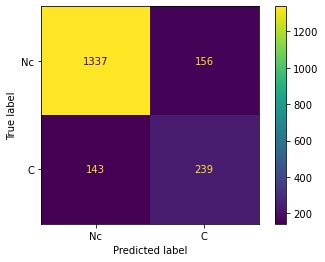

In [199]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_valid, preds>=thresholds[ix])

disp = ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=["Nc","C"])

disp.plot();

In [200]:
# The BASE conversion:
TN = confusion[0][0]
FN = confusion[1][0]
TP = confusion[1][1]
FP = confusion[0][1]


C0 = (TP+FN)/np.sum(confusion)
C0

0.20373333333333332

Разобьем тест на две части А и B. Для В применим модель. Это будет доп колонка. Далее сравним доп колонку с исходным B.

In [201]:
x_a,x_b,y_a,y_b = train_test_split(x_test,y_test, test_size=0.5, random_state=2, stratify=y_test)

In [202]:
pred_b = pipeline.predict_proba(x_b)[:,1]
confusion = confusion_matrix(y_b, pred_b>=thresholds[ix])
TN = confusion[0][0]
FN = confusion[1][0]
TP = confusion[1][1]
FP = confusion[0][1]
confusion


      Geography_France  Geography_Germany  Geography_Spain
5972                 0                  1                0
4957                 1                  0                0
7889                 0                  1                0
6666                 0                  0                1
1516                 1                  0                0
...                ...                ...              ...
7251                 0                  1                0
109                  0                  1                0
9882                 1                  0                0
6246                 1                  0                0
9275                 0                  1                0

[1250 rows x 3 columns]
      Gender_Female  Gender_Male
5972              0            1
4957              0            1
7889              0            1
6666              0            1
1516              1            0
...             ...          ...
7251              0            1
109

array([[894, 102],
       [111, 143]], dtype=int64)

In [203]:
# Conversion for A group without ML:-------------------------------------
result_a = (np.sum(y_a))/y_a.shape[0]
print("  --> A group conversion (EXITED NUMBER): {}".format(result_a))

# Conversion for the group B:--------------------------------------------
user_reaction_coefficient = 0.5
result_b = (FN + (1-user_reaction_coefficient) * TP) / np.sum(confusion)
print ("  --> B group conversion (PREDICTED EXITED NUMBER): {}".format(result_b))



  --> A group conversion (EXITED NUMBER): 0.204
  --> B group conversion (PREDICTED EXITED NUMBER): 0.146


#### Параметры (Пример):

1. базовая конверсия p=0.14
2. мы ожидаем увеличение конверсии хотя бы на 10% (относительно), иначе изменение для нас неоправдывается по тем или иным причинам

In [18]:
from scipy.stats import norm, zscore

def sample_power_probtest(p1, p2, power=0.8, sig=0.05):
    z = norm.isf([sig/2]) #two-sided t test
    zp = -1 * norm.isf([power]) 
    d = (p1-p2)
    s =2*((p1+p2) /2)*(1-((p1+p2) /2))
    n = s * ((zp + z)**2) / (d**2)
    return int(round(n[0]))

def sample_power_difftest(d, s, power=0.8, sig=0.05):
    z = norm.isf([sig/2])
    zp = -1 * norm.isf([power])
    n = s * ((zp + z)**2) / (d**2)
    return int(round(n[0]))

** link - https://stackoverflow.com/questions/15204070/is-there-a-python-scipy-function-to-determine-parameters-needed-to-obtain-a-ta

In [19]:
p = 0.14
min_effect = 0.1
alpha = 0.05
power = 0.8 #The power of a binary hypothesis test is the probability that the test rejects the null hypothesis when a specific alternative hypothesis is true


n = sample_power_probtest(p, p*(1+min_effect), power=power, sig=alpha)
print("With power={}, alpha={}, base_ctr={} and minimal effect={} we expect to have {} per variation".format(power,
                                                                                                alpha,
                                                                                                p,
                                                                                                min_effect,
                                                                                                n))

With power=0.8, alpha=0.05, base_ctr=0.14 and minimal effect=0.1 we expect to have 10043 per variation


Еще пример

In [20]:
p = 0.01
min_effect = 0.1
n = sample_power_probtest(p, p*(1+min_effect), power=power, sig=alpha)
print("With power={}, alpha={}, base_ctr={} and minimal effect={} we expect to have {} per variation".format(power,
                                                                                                alpha,
                                                                                                p,
                                                                                                min_effect,
                                                                                                n))

With power=0.8, alpha=0.05, base_ctr=0.01 and minimal effect=0.1 we expect to have 163096 per variation


### Важные моменты

### 1. как может быть устроено разбиение выборки на группы

Часто для этого используется отдельный сервис, который умеет для выбранного user_id возвращать группу (причем в рамках одного теста одну и ту же)

Основные способы разбиения:

### Random

<img src="sampling_random.png" alt="random split" style="width: 600px;" align="center"/>

### Stratified random

<img src="sampling_stratified.png" alt="strat random split" style="width: 600px;" align="center"/>

Какой вариант предпочтительнее - ответ зависит от объемов аудитории преимущественно и того, насколько смещенной получается случайная выборка относительно генеральной совокупности

### 2. Контрольный сегмент (как оценить вклад ML-решения в целом)

Таким образом, у нас теперь есть представление, как сравнивать между собой разные варианты. 

Однако на практике также может возникнуть вопрос, а какой вклад ML в целом. Т.е если мы представим ситуацию, что никаких изменений на основе ML нет, так бы выглядел сервис в таком случае? (в плане бизнес-метрик)

Чтобы ответить на этот вопрос, иногда выделяют так называемый <b>контрольный сегмент</b> - пользователей, которых никогда не затрагивают изменения на базе машинного обучения.

Например, если мы внедряем систему рекомендаций, то пользователи из контрольного сегмента не увидят эти рекомендации. 

Обычно контрольный сегмент небольшой.

### 3. Когда вариантов несколько

1. поправка Бонферонни - https://en.wikipedia.org/wiki/Bonferroni_correction

Идея простая - для каждого попарного сравнения (пусть будет m таких сравнений) заменить alpha на alpha/m


Прекрасная ссылка для чтения на дом - https://changyaochen.github.io/multiple-comparisons-jun-2020/

### Домашнее задание

#### 1. Если мы рассчитали 95% доверительный интервал для среднего значения, то какие из следующих утверждений являются верными?

Выберите несколько вариантов и попытайтесь объяснить свой выбор:

1) Если многократно повторять эксперимент, то 95 % выборочных средних значений будут принадлежать рассчитанному нами доверительному интервалу.

2) Мы можем быть на 95% уверены, что среднее значение в генеральной совокупности принадлежит рассчитанному доверительному интервалу.

3) Если многократно повторять эксперимент, для каждой выборки рассчитывать свой доверительный интервал, то в 95 % случаев истинное среднее будет находиться внутри доверительного интервала.

4) Среднее значение в генеральной совокупности точно превышает нижнюю границу 95% доверительного интервала.

5) Среднее значение в генеральной совокупности точно принадлежит рассчитанному доверительному интервалу.

#### 2. Если мы увеличиваем объем выборки в два раза (при условии, что показатель стандартного отклонения остается неизменным), то 95% доверительный интервал

Выберите один вариант из списка

1) стал более узким
2) возможны оба варианта
3) стал более широким

#### 3. В центре 95% доверительного интервала, рассчитанного по выборочным значениям, находится:

Выберите один вариант из списка

1) Значение стандартной ошибки среднего
2) Выборочное среднее значение
3) Среднее значение генеральной совокупности

#### 4. Часто на практике нулевая гипотеза отклоняется, и различия считаются статистически достоверными, если p < 0,05. Однако часто в статистике используется более жесткий критерий достоверности различий, например, при условии, что p < 0,01. Значение p-уровня значимости, которое выбирается, в качестве порога обозначается буквой α (альфа). Например, если исследователь решил, что α = 0,05, то и нулевая гипотеза будет отклоняться при условии, что p < 0,05. 

#### Если в определенной ситуации весьма рискованно отклонить нулевую гипотезу, когда она на самом деле верна, то лучше использовать показатель α равный 

Выберите один вариант из списка

1) 0,1
2) 0,001
3) 0,05
4) 0,5

#### 5. Данные некоторого исследования сообщают нам, что средний рост детей в 14 лет составляет 166 сантиметров. Однако это лишь выборочная оценка, и исследователи рассчитали 95% доверительный интервал, который составил [160, 172]. Укажите верные утверждения:

Выберите несколько вариантов и попытайтесь объяснить свой выбор:

1) У нас достаточно оснований отклонить нулевую гипотезу, что среднее в генеральной совокупности равняется 173
2) Вероятность того, что истинное среднее значение больше 172, составляет 0,01
3) У нас достаточно оснований отклонить нулевую гипотезу, что среднее в генеральной совокупности равняется 158.
4) Доверительный интервал не может иметь такие границы, т. к. выборочное стандартное отклонение равняется 10, следовательно доверительный интервал должен быть значительно шире.

#### 6. Предположим, нулевой гипотезой вашего исследования являлось предположение, что конверсия в генеральной совокупности равняется 0.4. Вы получили p = 0,12 и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что конверсия в генеральной совокупности действиетльно равна 0.4. Как можно оценить результаты?


Какой вариант корректный по вашему мнению и почему?
1) Вы не совершали ни ошибку первого рода, ни ошибку второго рода.
2) Вы совершили ошибку первого рода
3) Вы совершили ошибку второго рода